In [1]:
# load libraries
library(ggplot2)
library(MASS)
library(maps)
library(maptools)
library(sp)

# plot options for Jupyter Notebook
options(repr.plot.width = 10, repr.plot.height = 4.5)

# rgeos option
gpclibPermit()



 # ATTENTION: maps v3.0 has an updated 'world' map.        #
 # Many country borders and names have changed since 1990. #
 # Type '?world' or 'news(package="maps")'. See README_v3. #


Loading required package: sp
Checking rgeos availability: FALSE
 	Note: when rgeos is not available, polygon geometry 	computations in maptools depend on gpclib,
 	which has a restricted licence. It is disabled by default;
 	to enable gpclib, type gpclibPermit()


[1] FALSE

In [2]:
# load data from Quantlet
ENRGENICS_ADDOTHER_PATH = "../ENRgenics_AddOther/ENRgenics_AddOther.r"
source(ENRGENICS_ADDOTHER_PATH)
# paths for ImportEIA and climate Data
ENRGENICS_IMPORTEIA_PATH = "../ENRgenics_ImportEIA/ENRgenics_ImportEIA.r"
ENRGENICS_CLIMATE_DATA_PATH = "../data/climdiv-tmpcst-v1.0.0-20160605"
PATH_VARS = c(ENRGENICS_IMPORTEIA_PATH, ENRGENICS_CLIMATE_DATA_PATH)





Attaching package: ‘dplyr’

The following object is masked from ‘package:MASS’:

    select

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [3]:
# location of EIA data file
EIA_DATA_PATH = "../data/sales_revenue.csv.0"

file = EIA_DATA_PATH
df = load_eia_data_with_all_others(file)
head(df)


Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Joining by: "statename"
Joining by: c("Year", "Month", "State")


,Year,Month,State,DataStatus,Date,Cat,Revenue,Sales,Customers,Price,ID,statename,temp,Population,Income,Illiteracy,Life Exp,Murder,HS Grad,Frost,Area
1,1990,1,AK,Final,631195200,RESIDENTIAL,17477,181752,0,9.62,1,Alaska,-1.5,365,6315,1.5,69.31,11.3,66.7,152,566432
2,1990,1,AL,Final,631195200,RESIDENTIAL,123332,2070093,0,5.96,2,Alabama,49.8,3615,3624,2.1,69.05,15.1,41.3,20,50708
3,1990,1,AR,Final,631195200,RESIDENTIAL,72506,1026320,0,7.06,3,Arkansas,45.6,2110,3378,1.9,70.66,10.1,39.9,65,51945
4,1990,1,AZ,Final,631195200,RESIDENTIAL,109332,1396499,0,7.83,4,Arizona,40.8,2212,4530,1.8,70.55,7.8,58.1,15,113417
5,1990,1,CA,Final,631195200,RESIDENTIAL,597161,6168009,0,9.68,5,California,43.1,21198,5114,1.1,71.71,10.3,62.6,20,156361
6,1990,1,CO,Final,631195200,RESIDENTIAL,71325,1046805,0,6.81,6,Colorado,26.4,2541,4884,0.7,72.06,6.8,63.9,166,103766


Joining by: "State"
Warning message:
In left_join_impl(x, y, by$x, by$y): joining factors with different levels, coercing to character vectorJoining by: "State"
Warning message:
In left_join_impl(x, y, by$x, by$y): joining factor and character vector, coercing into character vectorJoining by: "State"
Warning message:
In left_join_impl(x, y, by$x, by$y): joining factor and character vector, coercing into character vectorJoining by: "State"
Warning message:
In left_join_impl(x, y, by$x, by$y): joining factor and character vector, coercing into character vectorJoining by: "State"


,Year,Month,State,DataStatus,Date,Cat,Revenue,Sales,Customers,Price,ID,statename,temp,Population,Income,Illiteracy,Life Exp,Murder,HS Grad,Frost,Area,salesClus,tempClus,areaClus,popClus,priceClus
1,1990,1,AK,Final,631195200,RESIDENTIAL,17477,181752,0,9.62,1,Alaska,-1.5,365,6315,1.5,69.31,11.3,66.7,152,566432,2,2,1,2,2
2,1990,1,AL,Final,631195200,RESIDENTIAL,123332,2070093,0,5.96,2,Alabama,49.8,3615,3624,2.1,69.05,15.1,41.3,20,50708,1,1,2,4,1
3,1990,1,AR,Final,631195200,RESIDENTIAL,72506,1026320,0,7.06,3,Arkansas,45.6,2110,3378,1.9,70.66,10.1,39.9,65,51945,5,1,2,4,1
4,1990,1,AZ,Final,631195200,RESIDENTIAL,109332,1396499,0,7.83,4,Arizona,40.8,2212,4530,1.8,70.55,7.8,58.1,15,113417,5,1,4,4,3
5,1990,1,CA,Final,631195200,RESIDENTIAL,597161,6168009,0,9.68,5,California,43.1,21198,5114,1.1,71.71,10.3,62.6,20,156361,4,1,4,3,2
6,1990,1,CO,Final,631195200,RESIDENTIAL,71325,1046805,0,6.81,6,Colorado,26.4,2541,4884,0.7,72.06,6.8,63.9,166,103766,5,4,4,4,3


[1] "plots..."


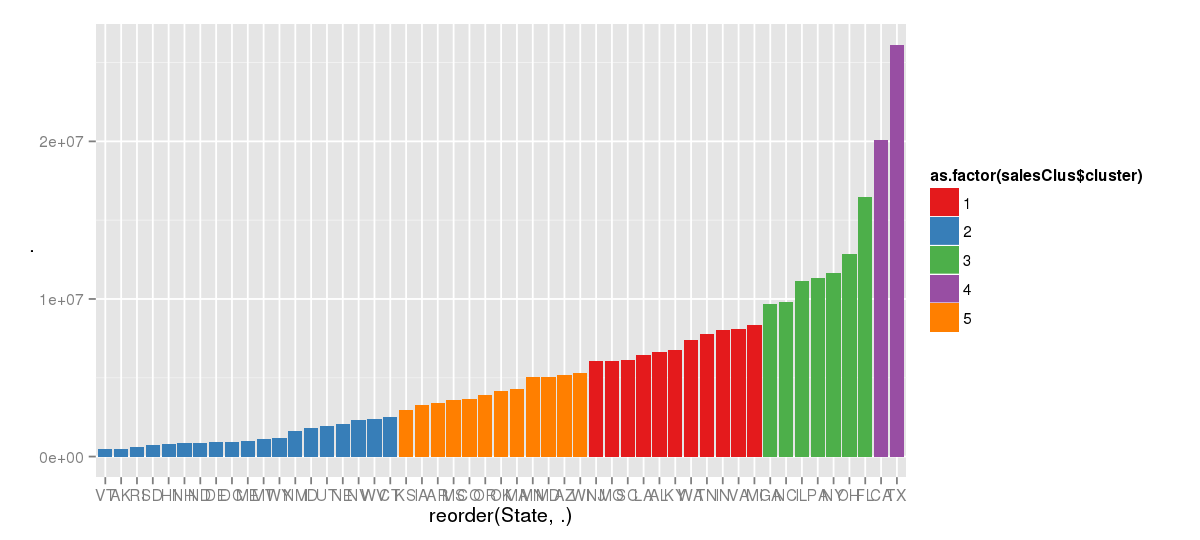

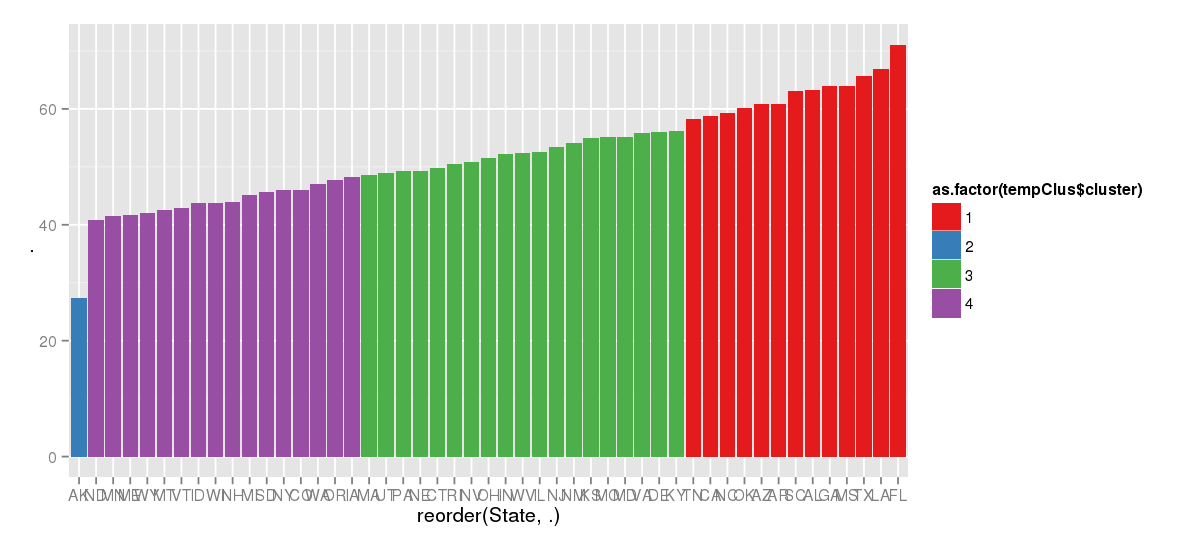

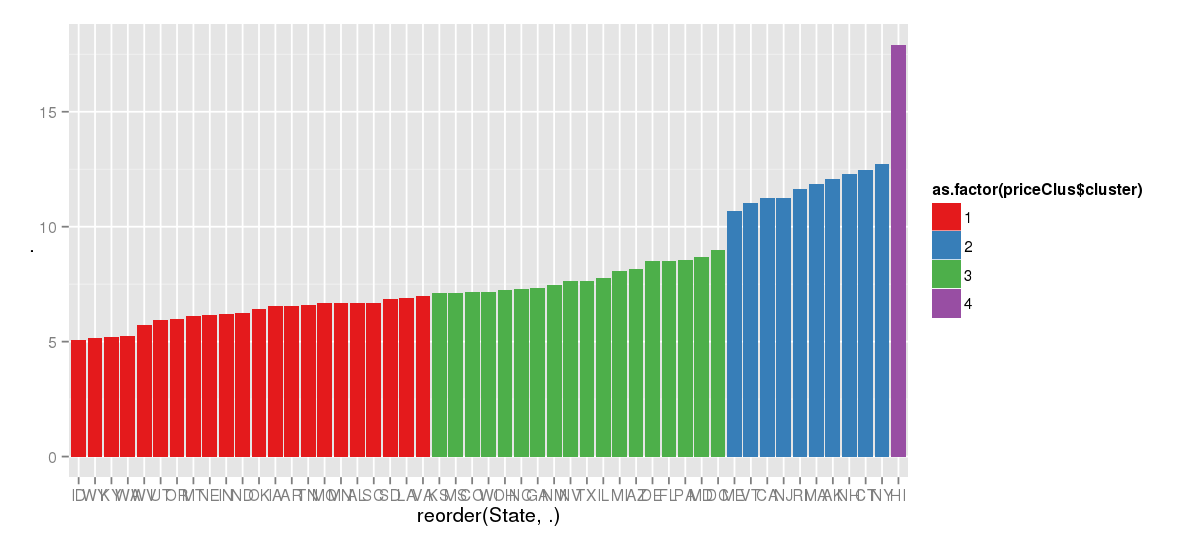

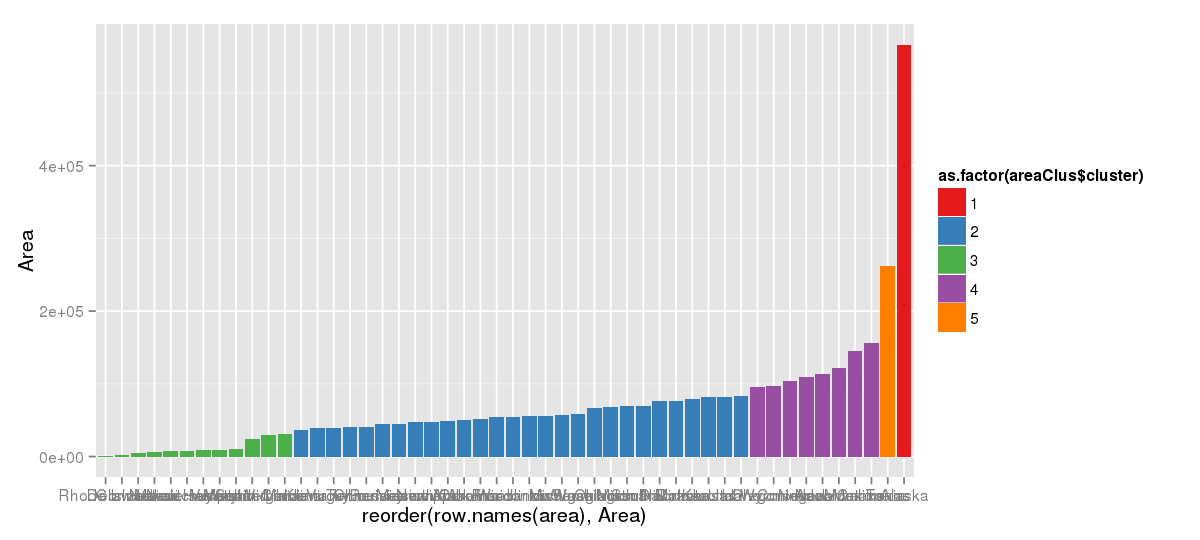

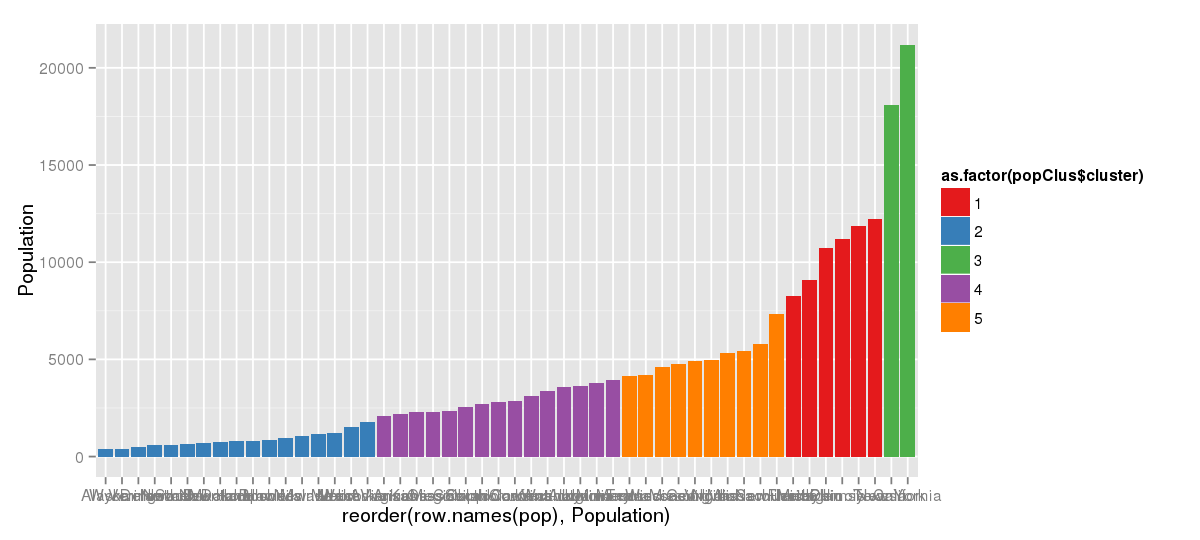

In [4]:
finalsdf = subset(df, DataStatus=="Final")
mean_sales_by_state = dcast(finalsdf[which(finalsdf$Cat == "TOTAL"),], State ~ . , value.var="Sales", fun.aggregate = mean)
mean_temp_by_state = dcast(finalsdf[which(finalsdf$Cat == "TOTAL"),], State ~ . , value.var="temp", fun.aggregate = mean)
mean_price_by_state = dcast(finalsdf[which(finalsdf$Cat == "TOTAL"),], State ~ . , value.var="Price", fun.aggregate = mean)

mean_sales_by_state = mean_sales_by_state[order(mean_sales_by_state$.),]
mean_temp_by_state = mean_temp_by_state[order(mean_temp_by_state$.),]
mean_temp_by_state = mean_temp_by_state[complete.cases(mean_temp_by_state),]
mean_price_by_state = mean_price_by_state[order(mean_price_by_state$.),]

#tail(mean_sales_by_state)
#head(mean_temp_by_state)
salesClus = kmeans(mean_sales_by_state[, c(".")], 5, nstart = 20, iter.max = 20)
s1Clus = data.frame(cbind(mean_sales_by_state[,1], salesClus$cluster))
colnames(s1Clus) = c("State", "salesClus")

tempClus = kmeans(mean_temp_by_state[, c(".")], 4, nstart = 20, iter.max = 20)
s2Clus = data.frame(cbind(mean_temp_by_state[,1], tempClus$cluster))
colnames(s2Clus) = c("State", "tempClus")

priceClus = kmeans(mean_price_by_state[, c(".")], 4, nstart = 20, iter.max = 20)
s5Clus = data.frame(cbind(mean_price_by_state[,1], priceClus$cluster))
colnames(s5Clus) = c("State", "priceClus")

area = as.data.frame(state.x77)
areaClus = kmeans(area[, c("Area")], 5, nstart = 20, iter.max = 20)
s3Clus = data.frame(cbind(state.abb, areaClus$cluster))
colnames(s3Clus) = c("State", "areaClus")

pop = as.data.frame(state.x77)
popClus = kmeans(pop[, c("Population")], 5, nstart = 20, iter.max = 20)
s4Clus = data.frame(cbind(state.abb, popClus$cluster))
colnames(s4Clus) = c("State", "popClus")

sClus = s1Clus %>% left_join(s2Clus) %>% left_join(s3Clus) %>% left_join(s4Clus) %>% left_join(s5Clus)
finalsdf = finalsdf  %>% left_join(sClus)
head(finalsdf)

print("plots...")
ggplot(mean_sales_by_state, aes(x = reorder(State, .), y = ., fill=as.factor(salesClus$cluster))) + 
  geom_bar(stat = "identity") +
  scale_fill_brewer(palette="Set1")

ggplot(mean_temp_by_state, aes(x = reorder(State, .), y = ., fill=as.factor(tempClus$cluster))) + 
  geom_bar(stat = "identity") +
  scale_fill_brewer(palette="Set1")

ggplot(mean_price_by_state, aes(x = reorder(State, .), y = ., fill=as.factor(priceClus$cluster))) + 
  geom_bar(stat = "identity") +
  scale_fill_brewer(palette="Set1")

ggplot(area, aes(x = reorder(row.names(area), Area), y = Area, fill=as.factor(areaClus$cluster))) + 
  geom_bar(stat = "identity") +
  scale_fill_brewer(palette="Set1")

ggplot(pop, aes(x = reorder(row.names(pop), Population), y = Population, fill=as.factor(popClus$cluster))) + 
  geom_bar(stat = "identity") +
  scale_fill_brewer(palette="Set1")


In [14]:
#totals = subset(finalsdf, popClus == 1)
# tmp = dcast(totals[which(totals$Cat == "TOTAL"),], Year + Month ~ State + Cat, value.var="Sales", fun.aggregate = sum, na.rm = TRUE)
#ts_year_by_state = dcast(totals[which(totals$Cat == "TOTAL"),], Year ~ State, value.var="Sales", fun.aggregate = sum)


,Year,CA,NY
1,1990,211092921,129324439
2,1991,208650490,129410968
3,1992,213447241,128469712
4,1993,210499926,130170178
5,1994,213684303,131176572
6,1995,212604724,130470716
7,1996,218112487,131527186
8,1997,227880126,131943926
9,1998,236433971,134195524
10,1999,234830881,139377640


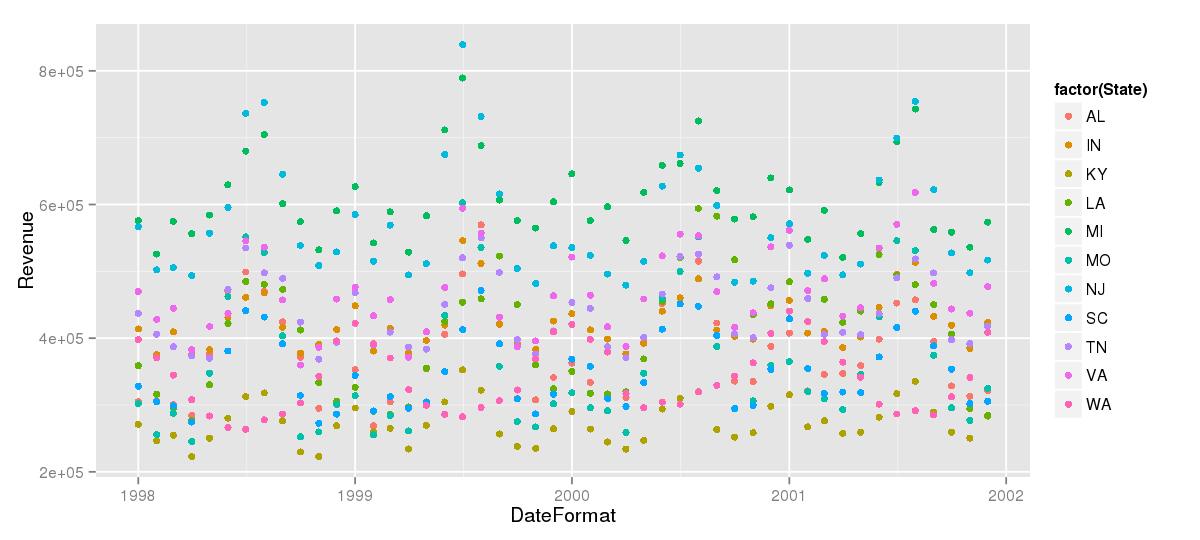

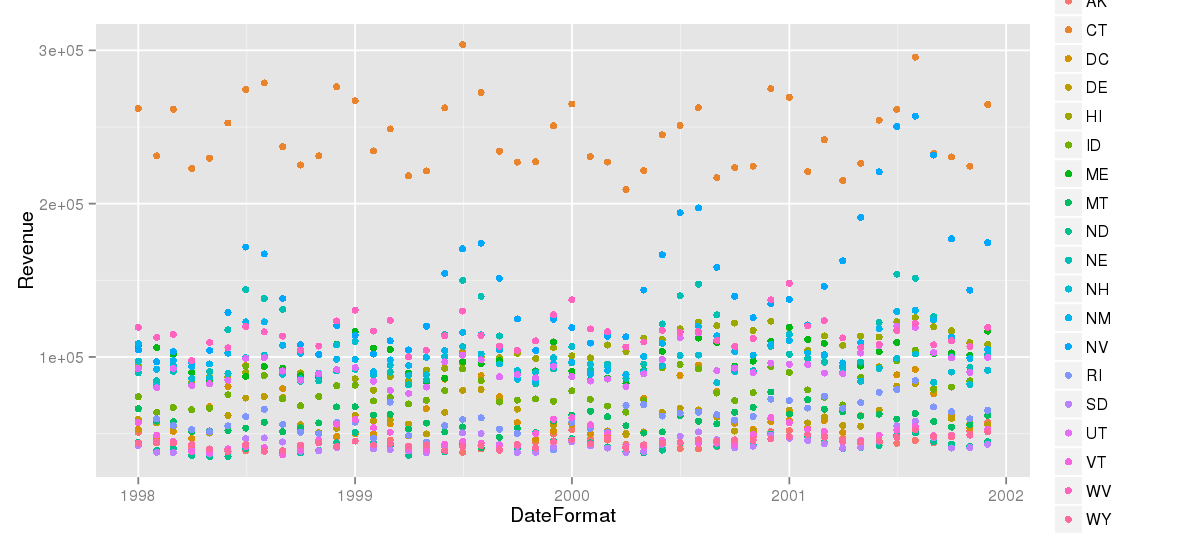

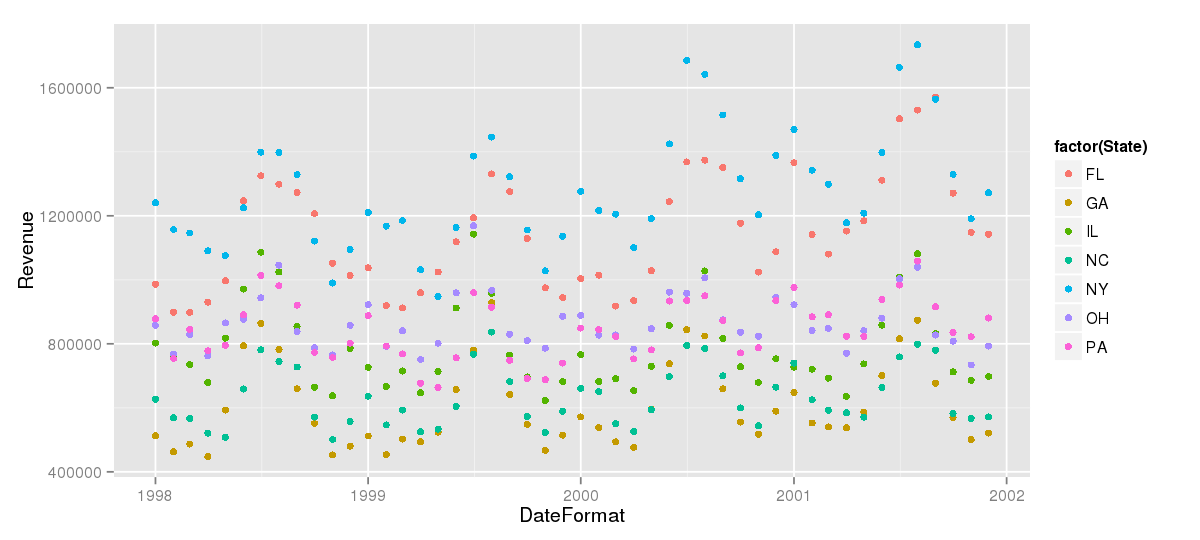

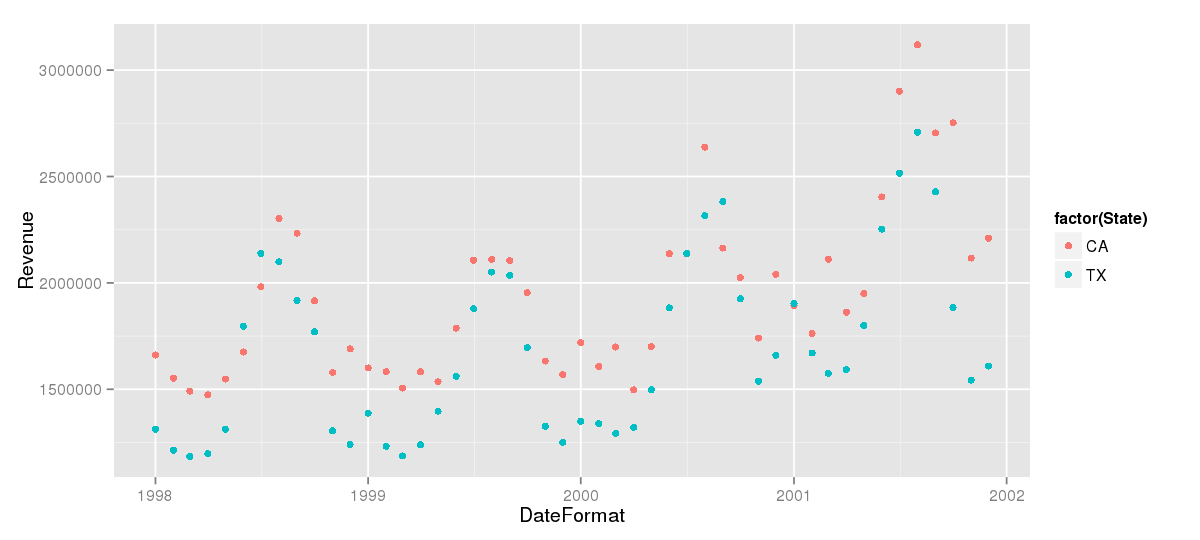

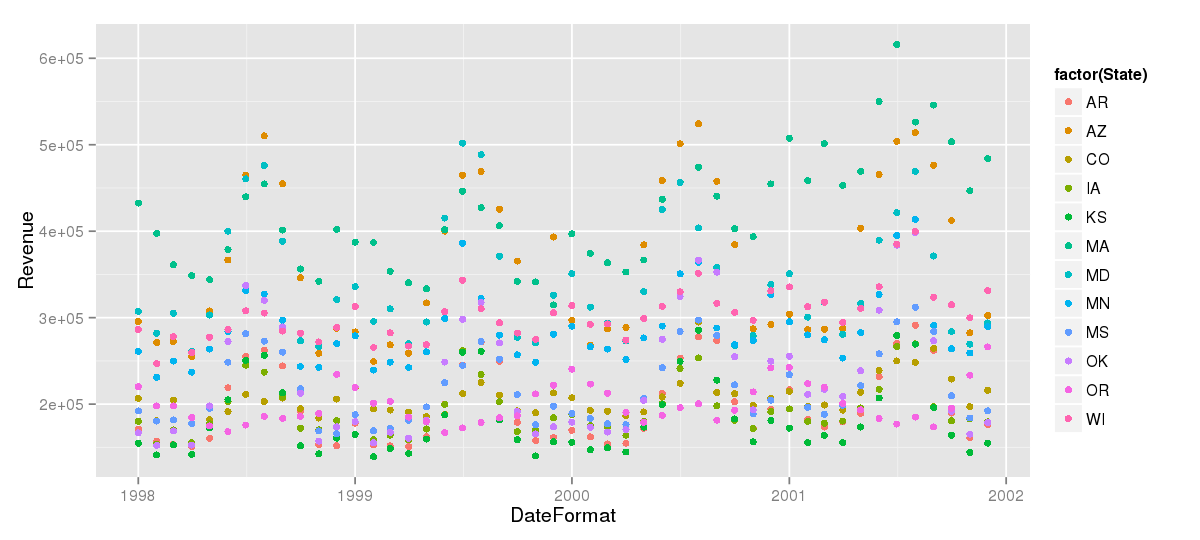

In [5]:
#http://www.r-bloggers.com/ggplot2-cheatsheet-for-scatterplots/

# Plot Set 1

for (i in row.names(salesClus$centers)) {
    totals = subset(finalsdf, Cat == "TOTAL" & salesClus == as.integer(i) & (Year > 1997 & Year < 2002))
    totals$DateFormat = as.Date(as.POSIXct(totals$Date, origin="1970-01-01"))
    p1 = ggplot(totals, aes(x = DateFormat, y = Revenue)) + geom_point(aes(color=factor(State)))
    print(p1)
    savefile = paste("output/plt1_",i,".png", sep="")
    ggsave(savefile, width = 30, height = 20, dpi = 120)
}

# Plot Set 2
#forp2 = ts_year_by_state
#forp2$total = apply(ts_year_by_state[,2:ncol(ts_year_by_state)], 1,function(x){sum(x)})
#p2 = ggplot(forp2, aes(x = Year, y = total))
#p2 + geom_point(aes(color=factor(Year)))

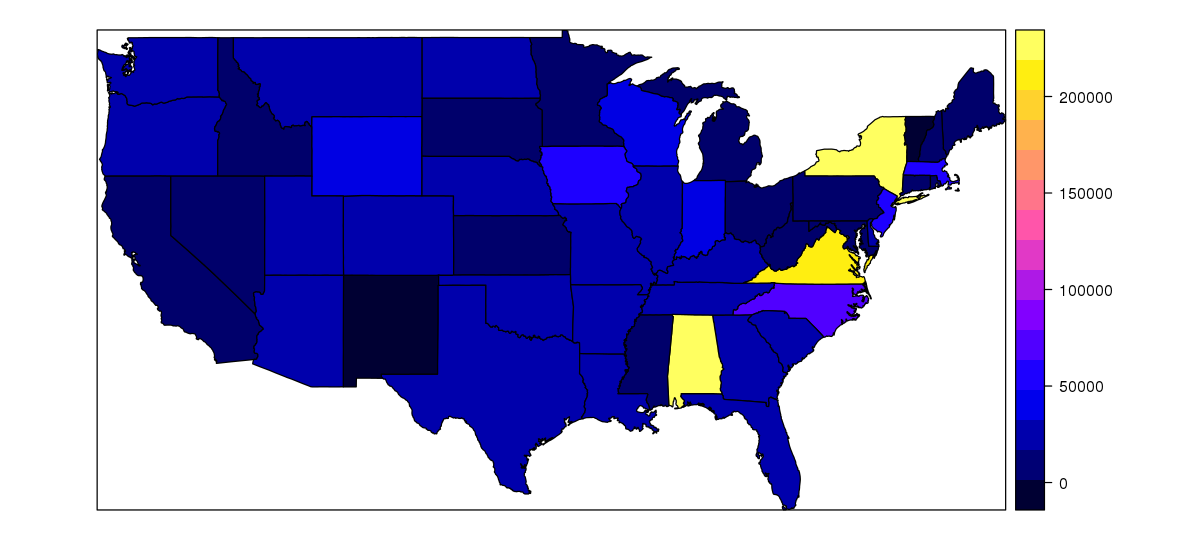

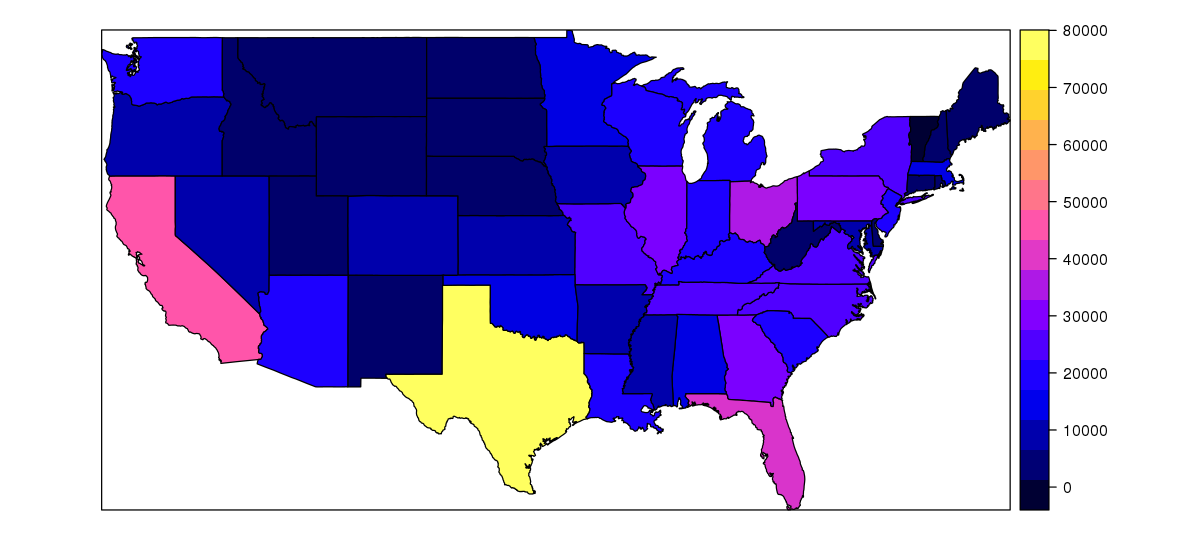

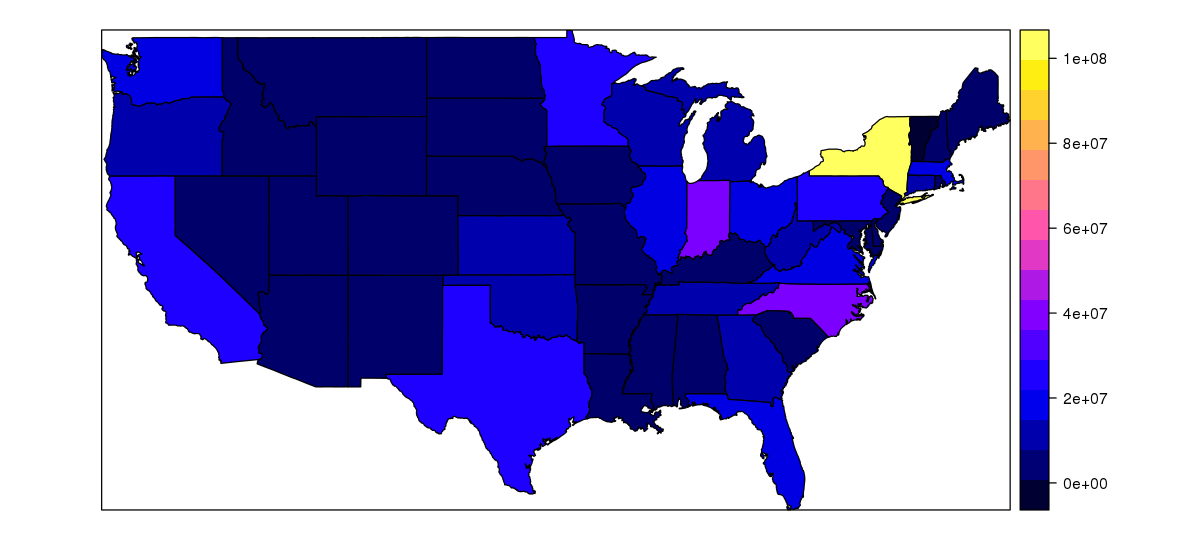

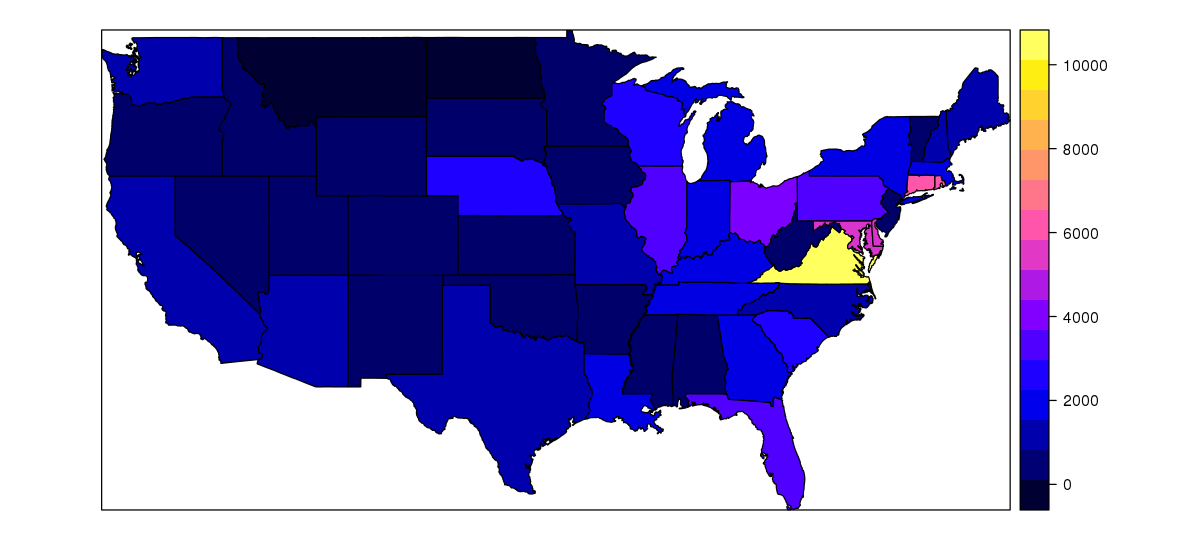

In [6]:
# consider weather data
# https://ram-n.github.io/weatherData/

# mapping without advanced libs
# http://stackoverflow.com/questions/24441775/how-do-you-create-a-us-states-heatmap-based-on-some-values

ts_year_by_state = dcast(finalsdf[which(finalsdf$Cat == "TOTAL"),], Year ~ State, value.var="Sales", fun.aggregate = sum)
means_by_state = colMeans(ts_year_by_state[,c(-1,-9)]) # this removes the year column and DC
normalizers = matrix(c(state.x77[,1], state.x77[,2], state.x77[,5], state.area), nrow=50, ncol=4)  # Population, Income, Murder Rate (for fun) and Area


permit = gpclibPermit()
for (i in 1:dim(normalizers)[2]) {
    means_df = data.frame(means_by_state / normalizers[,i])
    dat = means_df
    dat$states <- tolower(state.name[match(rownames(dat),  state.abb)])
    mapUSA <- map('state',  fill = TRUE,  plot = FALSE)
    nms <- sapply(strsplit(mapUSA$names,  ':'),  function(x){x[1]})
    USApolygons <- map2SpatialPolygons(mapUSA,  IDs = nms,  CRS('+proj=longlat'))

    idx <- match(unique(nms),  dat$states)
    dat2 <- data.frame(value = dat$means_by_state[idx], state = unique(nms))
    row.names(dat2) <- unique(nms)
    USAsp <- SpatialPolygonsDataFrame(USApolygons,  data = dat2)

    print(spplot(USAsp['value']))
}

# https://www.census.gov/popest/data/datasets.html
# https://docs.google.com/spreadsheets/d/1JsV5bNnFoE-4xapsnrpqRP-5wgTkpDjgC0SXKW8zgPI/edit#gid=0